In [1]:
import matplotlib.pyplot as plt
import numpy as np
import sympy

%matplotlib inline
def plot_slope(x,y,slope, size=1, color="blue"):
    dx = size*.5/np.sqrt(1+slope**2)
    x0 = x-dx
    x1 = x+dx
    y0 = y - dx*slope
    y1 = y + dx*slope
    plt.plot([x0,x1], [y0,y1], color=color)

In [22]:
from scipy.integrate import odeint
from scipy.integrate import ode

def numeric_ode(f, t0, y0, tmin, tmax, nsteps=100.):
    dt   = (tmax-tmin)/nsteps
    r = ode(f).set_integrator('dopri5')
    r.set_initial_value(y0,t0)
    # From the initial value we need to plot forward ...
    t,y = [t0],[y0]
    while r.successful() and r.t <= tmax:
        r.integrate(r.t + dt)
        y.append(r.y[0]);  t.append(r.t)

    # ... and then backwards
    r.set_initial_value(y0,t0)
    while r.successful() and r.t >= tmin:
        r.integrate(r.t - dt)
        y.insert(0,r.y[0]); t.insert(0,r.t)
    return t,y

## Solves and plots numerically various instances (initial values) of a differential equation

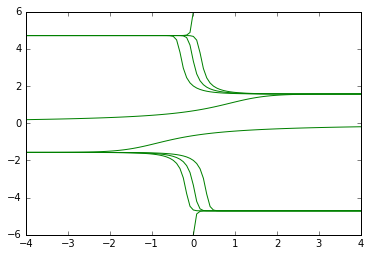

In [23]:
def f(t,y):
    return [y[0]**2*np.cos(y[0])]


t0 = 0.
tmin = -4
tmax = +4
for y0 in np.linspace(-6,6,10):
    t,y = numeric_ode (f, t0, y0, tmin, tmax)
    plt.plot(t,y, color="green")

plt.ylim(-6,6);
plt.xlim(tmin, tmax);

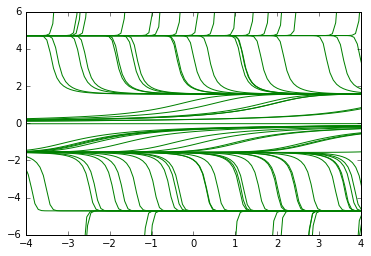

In [24]:
tmin, tmax = -4, +4
for i in range(100):
    y0 = np.random.random()*12-6
    t0 = np.random.random()*8-4
    t,y = numeric_ode (f, t0, y0, tmin, tmax)
    plt.plot(t,y, color="green")
    
plt.ylim(-6,6);
plt.xlim(tmin, tmax);

## Plotting the slope field

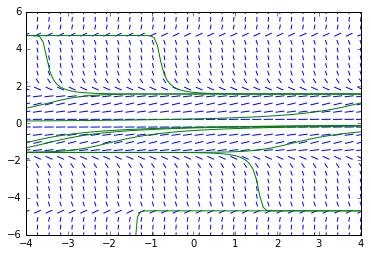

In [25]:
tmin, tmax = -4, +4
for y0 in np.linspace(-6,6,30):
    for t0 in np.linspace(-4,4,30):
        plot_slope(t0,y0,f([t0],[y0])[0],size=.2)

for i in range(10):
    y0 = np.random.random()*12-6
    t0 = np.random.random()*8-4
    t,y = numeric_ode (f, t0, y0, tmin, tmax)
    plt.plot(t,y, color="green")

plt.ylim(-6,6);
plt.xlim(tmin, tmax);

## Comparing an estimation of the slope at any point using a numerical solution to the differential equation around the point of slope with the actual slope from the differential equation

In [30]:
def get_numeric_slope(f, t0, y0, dt, nsteps=2.):
    t,y = numeric_ode(f, t0, y0, t0-dt, t0+dt, nsteps=nsteps)
    return (y[-1]-y[0])/(t[-1]-t[0])

In [40]:
t0,y0 = np.random.random(2)
print "slope estimation", get_numeric_slope(f,t0,y0,.00001)
print "exact slope     ", f([t0],[y0])[0]

slope estimation 0.149053858322
exact slope      0.149053858316


of course, the estimation is much slower

In [32]:
%timeit get_numeric_slope(f,t0,y0,.00001)

10000 loops, best of 3: 180 µs per loop


In [33]:
%timeit f([t0],[y0])[0]

The slowest run took 15.24 times longer than the fastest. This could mean that an intermediate result is being cached.
100000 loops, best of 3: 1.97 µs per loop
